In [83]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see there are no missing values present

# Distribution of dependent variable, Exited

In [14]:
churn = df['Exited'].value_counts().reset_index()
churn.head()

,Exited,count
0,0,7963
1,1,2037


In [9]:
(df[df['Exited'] == 1].shape[0] / df.shape[0]) * 100

20.369999999999997

Only around 20 % of data is showing churn

We can see this is a highly imbalanced dataset

<Axes: xlabel='Exited', ylabel='count'>

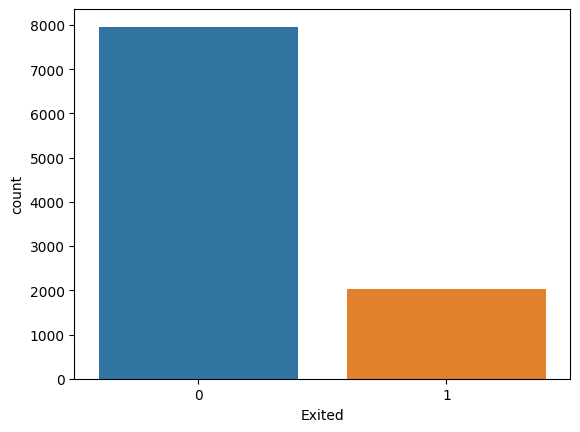

In [21]:
sns.barplot(x = churn['Exited'], y = churn['count'])

<Axes: xlabel='Tenure', ylabel='Density'>

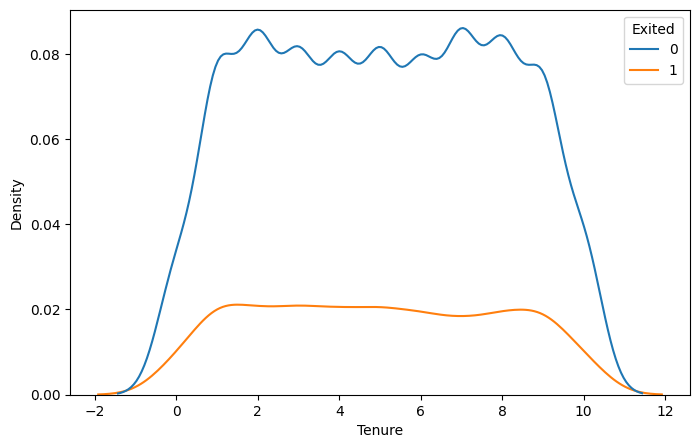

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(x = df['Tenure'], hue = df['Exited'])

The above graph shows the relation between Tenure and Churning. The lesser the tenure, the more the chances to churn. So, one of the ways to reduce customer churning would be to retain the customers for longer tenure, so it reduces the chances of churning.

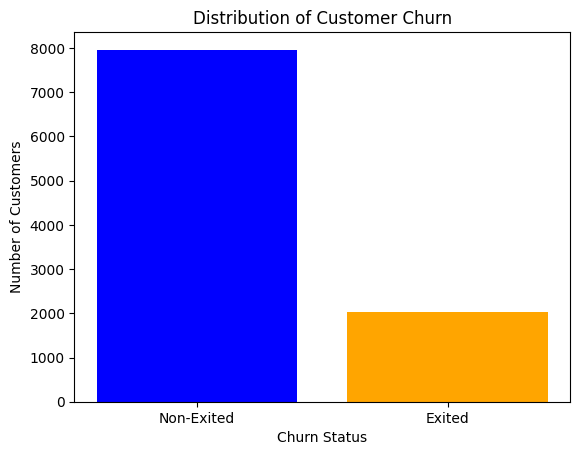

In [24]:
# Count the number of customers who churned (Exited=1) and who haven't churned (Exited=0)
churn_counts = df['Exited'].value_counts()

# Create a bar chart to visualize the distribution of customer churn
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orange'])
plt.xticks(churn_counts.index, labels=['Non-Exited', 'Exited'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn')
plt.show()

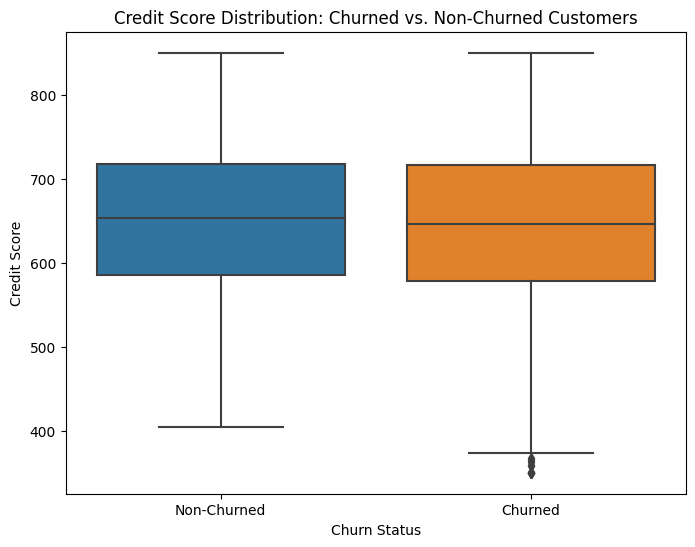

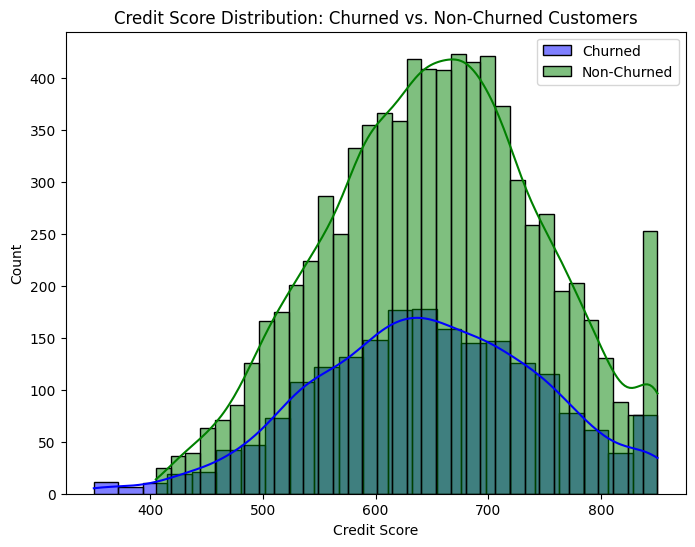

In [33]:
# Create separate DataFrames for churned and non-churned customers
churned_customers = df[df['Exited'] == 1]
non_churned_customers = df[df['Exited'] == 0]

# Create a box plot to compare credit scores for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Exited'], y=df['CreditScore'])
plt.xlabel('Churn Status')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution: Churned vs. Non-Churned Customers')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

# Create a distribution plot to compare credit scores for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.histplot(x=churned_customers['CreditScore'], label='Churned', kde=True, color='blue')
sns.histplot(x=non_churned_customers['CreditScore'], label='Non-Churned', kde=True, color='green')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution: Churned vs. Non-Churned Customers')
plt.legend()
plt.show()

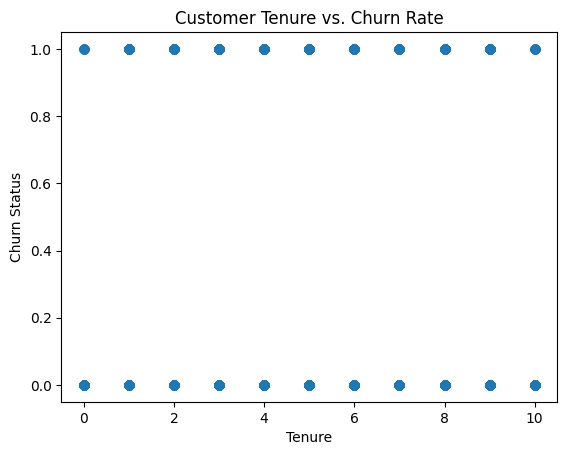

In [5]:
# Step 6: Tenure and Churn - Create a scatter plot to show customer tenure vs. churn rate
plt.scatter(df['Tenure'], df['Exited'], alpha=0.2)
plt.xlabel('Tenure')
plt.ylabel('Churn Status')
plt.title('Customer Tenure vs. Churn Rate')
plt.show()

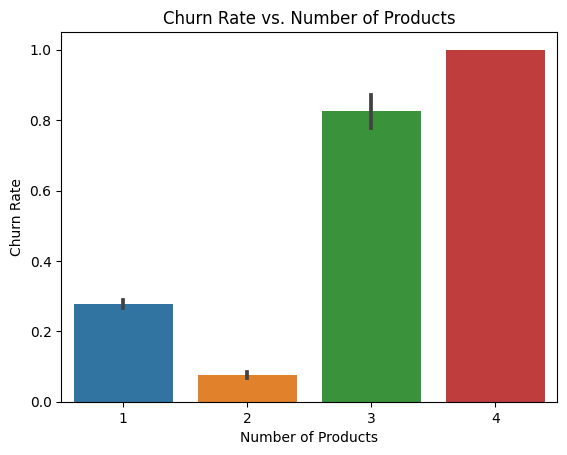

In [6]:
# Step 7: Customer Engagement - Create bar charts or heatmaps to show the relationship between customer engagement features and churn
# Example: Bar chart for NumOfProducts vs. Churn
sns.barplot(x='NumOfProducts', y='Exited', data=df)
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Number of Products')
plt.show()

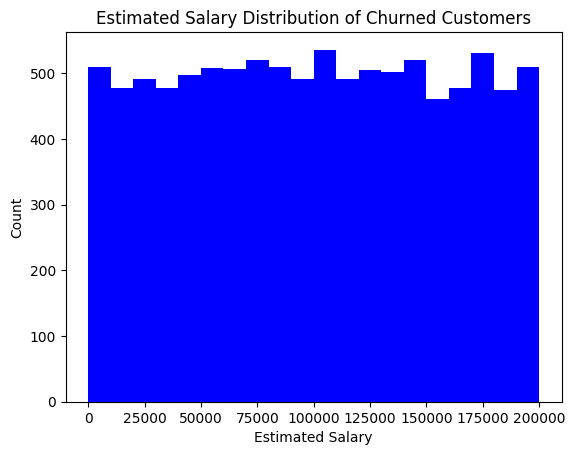

In [8]:
# Step 8: Salary Distribution of Churned Customers - Create a histogram to visualize the estimated salary distribution of churned customers
plt.hist(df['EstimatedSalary'], bins=20, color='blue')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.title('Estimated Salary Distribution of Churned Customers')
plt.show()

In [4]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
def calculate_ratios(ax):
    l = len(ax.patches)
    cnt = 0
    without_churn = []
    with_churn = []
    for p in ax.patches:
        if cnt < l/2:
            without_churn.append(p.get_height())
        else:
            with_churn.append(p.get_height())
        cnt += 1;
            
    print("without_churn : ", without_churn)
    print("with_churn : ", with_churn)
    
    ratio = []
    for i in range(len(without_churn)):
        ratio.append(with_churn[i]/without_churn[i])
        
    print("ratio : ", ratio)

(array([0, 1, 2]),
 [Text(0, 0, 'France'), Text(1, 0, 'Spain'), Text(2, 0, 'Germany')])

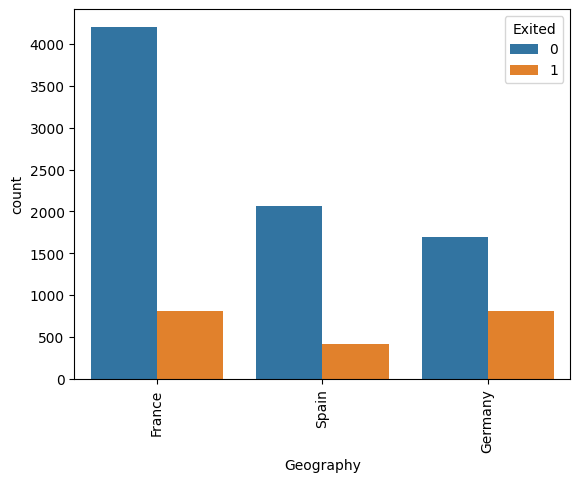

In [14]:
ax = sns.countplot(x=df['Geography'], hue=df['Exited'])
plt.xticks(rotation = 90)

In [19]:
calculate_ratios(ax)

without_churn :  [4204.0, 2064.0, 1695.0]
with_churn :  [810.0, 413.0, 814.0]
ratio :  [0.19267364414843008, 0.2000968992248062, 0.48023598820059]


So from the above ratios, we have seen that Germany has the maximum ratio. The customers who churn are mostly from Germany.

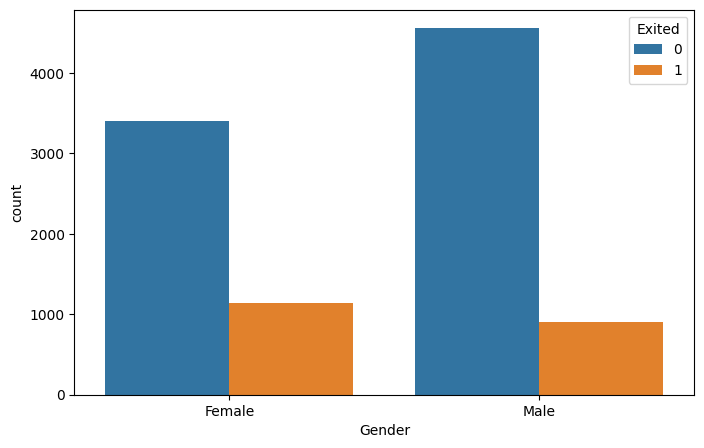

In [20]:
plt.figure(figsize = (8,5))
g = sns.countplot(x=df['Gender'], hue=df['Exited'])

In [21]:
calculate_ratios(g)

without_churn :  [3404.0, 4559.0]
with_churn :  [1139.0, 898.0]
ratio :  [0.33460634547591067, 0.19697302039921036]


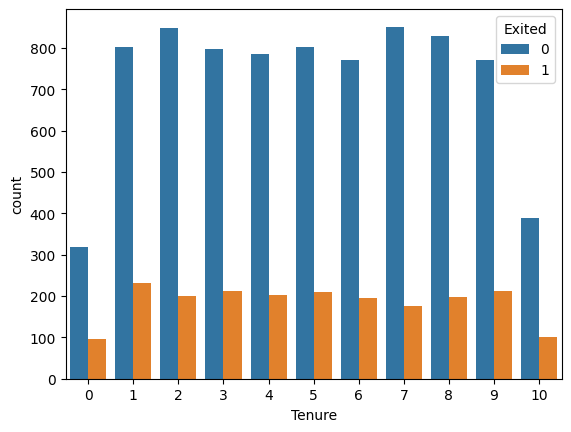

In [25]:
dev = sns.countplot(x=df['Tenure'], hue=df['Exited'])

In [26]:
calculate_ratios(dev)

without_churn :  [318.0, 803.0, 847.0, 796.0, 786.0, 803.0, 771.0, 851.0, 828.0, 771.0, 389.0]
with_churn :  [95.0, 232.0, 201.0, 213.0, 203.0, 209.0, 196.0, 177.0, 197.0, 213.0, 101.0]
ratio :  [0.29874213836477986, 0.2889165628891656, 0.23730814639905548, 0.2675879396984925, 0.2582697201017812, 0.2602739726027397, 0.25421530479896237, 0.20799059929494712, 0.23792270531400966, 0.27626459143968873, 0.2596401028277635]


Customers with 1 year tenure are most likely to churn.

In [28]:
churning = df[df['Exited'] == 1]
churning.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1


In [29]:
status = churning['HasCrCard'].value_counts().reset_index()
status.head()

,HasCrCard,count
0,1,1424
1,0,613


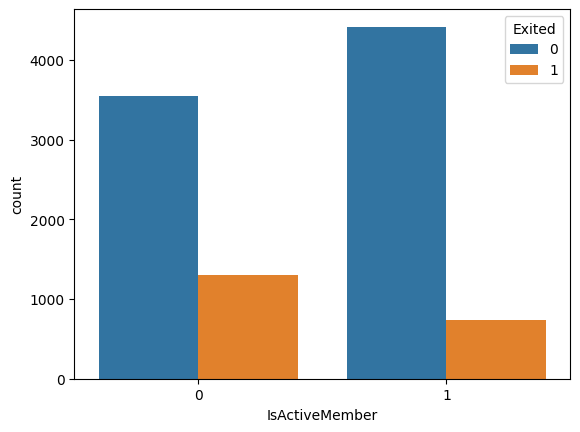

In [30]:
status = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'])

In [31]:
calculate_ratios(status)

without_churn :  [3547.0, 4416.0]
with_churn :  [1302.0, 735.0]
ratio :  [0.3670707640259374, 0.16644021739130435]


The customers who are not active members are more likely to churn.

In [32]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

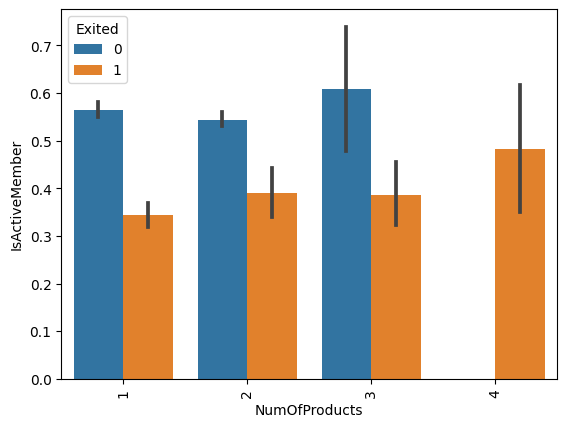

In [36]:
productpref = sns.barplot(x=df['NumOfProducts'], y=df['IsActiveMember'], hue=df['Exited'])
plt.xticks(rotation = 90)

In [37]:
calculate_ratios(productpref)

without_churn :  [0.5654421768707483, 0.5445544554455446, 0.6086956521739131, nan]
with_churn :  [0.34421575585521647, 0.39080459770114945, 0.38636363636363635, 0.48333333333333334]
ratio :  [0.6087550061443313, 0.7176593521421107, 0.6347402597402597, nan]


<Axes: xlabel='NumOfProducts', ylabel='IsActiveMember'>

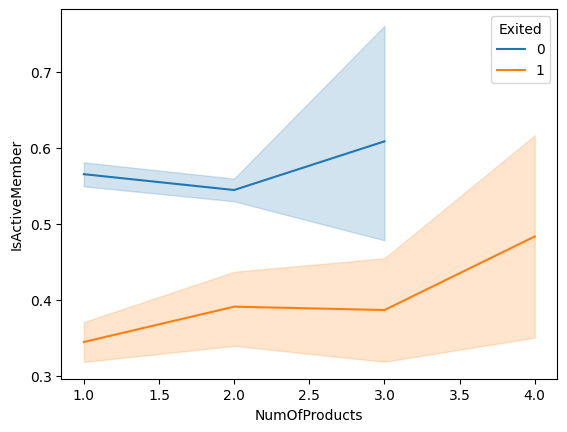

In [38]:
sns.lineplot(x=df['NumOfProducts'], y=df['IsActiveMember'], hue=df['Exited'])

From the above graph, we can see that most of the customers that churn are having more products. This shows that the organisation or the company should focus on long term relations with customer to provide them consistent quality products.

<Axes: xlabel='CreditScore', ylabel='Count'>

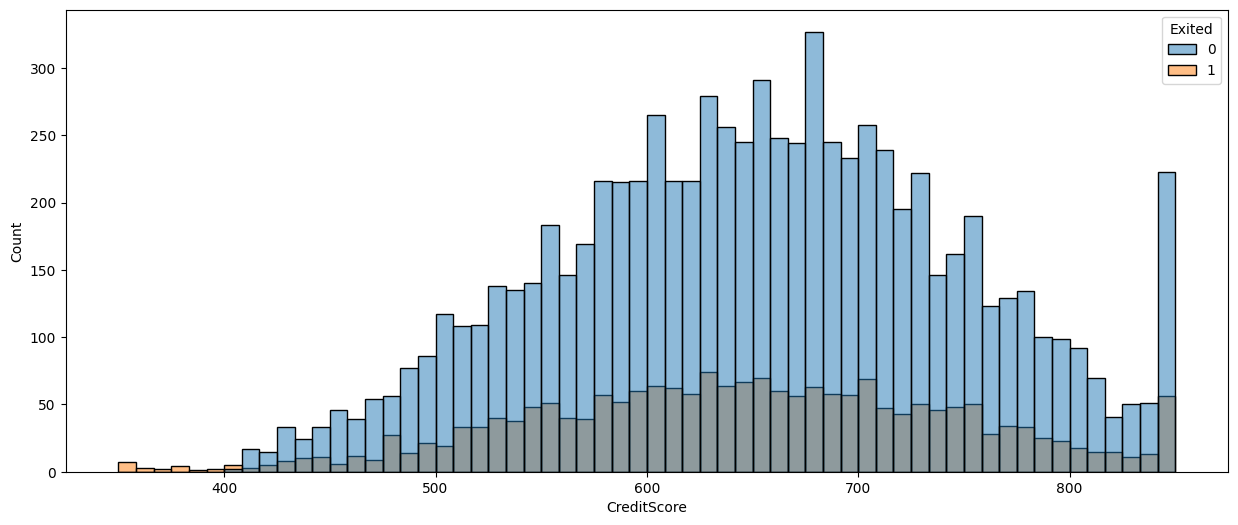

In [39]:
plt.figure(figsize=(15,6))
sns.histplot(x=df['CreditScore'], hue=df['Exited'], bins=60)

In [79]:
df = pd.read_csv("Churn_Modelling.csv")

In [93]:
df.drop(columns=['CustomerId'], inplace=True)

KeyError: "['CustomerId'] not found in axis"

Dropped the CustomerId as it has nothing to do.

In [91]:
df.drop(columns=['Surname'], inplace=True)

Dropped the Surname.

# ML Models: Logistic Regression, Random Forest, Adaboost, Descision Tree

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],  drop_first=True)



In [98]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
# Separate features and target variable
X = data_encoded.drop(columns=['Exited'])
y = data_encoded['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [100]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Class weights for imbalanced data (assuming churned is minority class)
class_weights = {0: 1.0, 1: 5.0}  # Adjust the weight values based on the actual imbalance

In [101]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_preds = dt_model.predict(X_test)

# Logistic Regression
logreg_model = LogisticRegression(class_weight=class_weights, random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)
logreg_preds = logreg_model.predict(X_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)
adaboost_preds = adaboost_model.predict(X_test)

In [102]:
# Evaluation
def evaluate_model(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("AdaBoost", y_test, adaboost_preds)

--- Random Forest ---
Confusion Matrix:
 [[2101  279]
 [ 267  353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2380
           1       0.56      0.57      0.56       620

    accuracy                           0.82      3000
   macro avg       0.72      0.73      0.72      3000
weighted avg       0.82      0.82      0.82      3000

ROC AUC Score: 0.7260639739766874
--- Decision Tree ---
Confusion Matrix:
 [[1920  460]
 [ 249  371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      2380
           1       0.45      0.60      0.51       620

    accuracy                           0.76      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.79      0.76      0.78      3000

ROC AUC Score: 0.7025548929249119
--- Logistic Regression ---
Confusion Matrix:
 [[ 115 2265]
 [   6  614]]
Classification Repor

From the evaluation, it looks like the Random Forest and AdaBoost models are performing relatively better compared to the Decision Tree and Logistic Regression models. They have higher accuracy and better ROC AUC scores.